# Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import pickle


## Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Preprocessing
from sklearn.preprocessing import  StandardScaler, LabelEncoder

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



# Import and clean data

In [4]:
heart = pd.read_csv(r'heart.csv')

In [5]:
heart.shape

(1025, 14)

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# [Attribute Information:]()

* **Age**
* **Sex**
* **chest pain type (4 values)**: cp
* **resting blood pressure**: 
* **serum cholestoral in mg/dl**
* **fasting blood sugar > 120 mg/dl**
* **resting electrocardiographic results (values 0,1,2)**
* **maximum heart rate achieved**
* **exercise induced angina**
* **oldpeak = ST depression induced by exercise relative to rest**
* **the slope of the peak exercise ST segment**
* **number of major vessels (0-3) colored by flourosopy**
* **thal: 0 = normal; 1 = fixed defect; 2 = reversable defect**
* **The names and social security numbers of the patients were recently** 



In [9]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# [Data type of each columns](http://)

In [10]:
print(heart.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


# [Checking for NaN Values](http://)

In [11]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# [Data Analysis](http://)



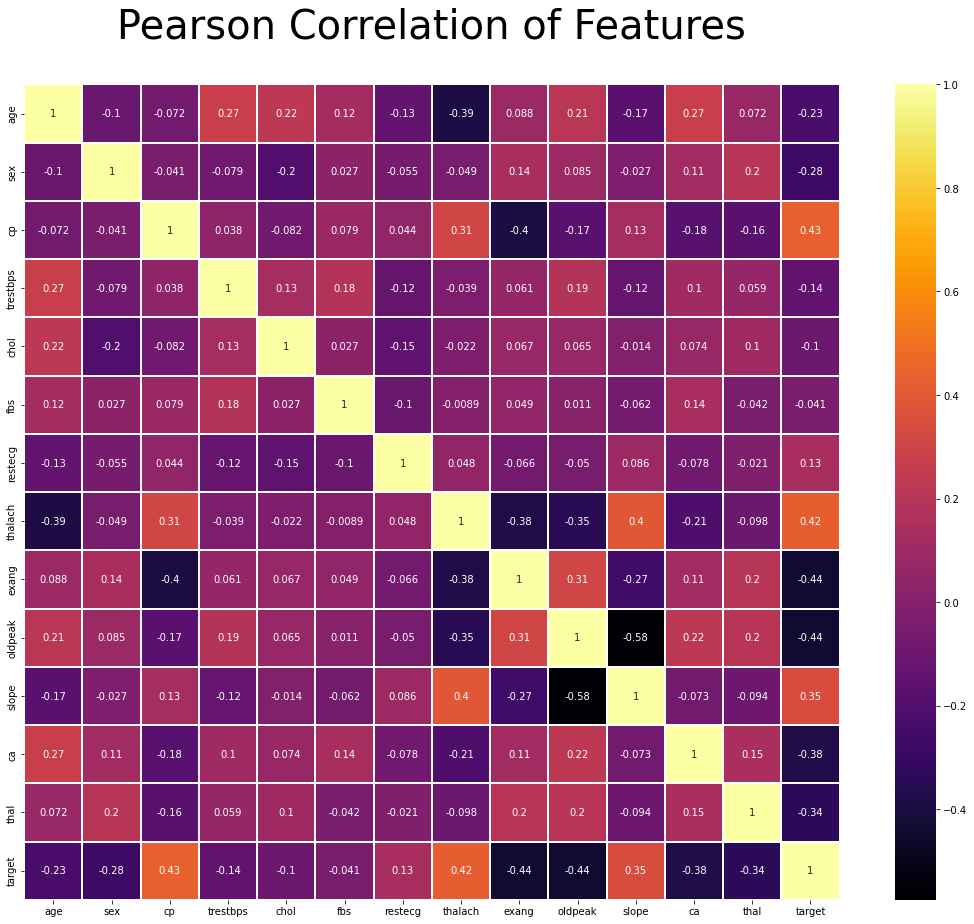

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.inferno
plt.figure(figsize=(20,15));
plt.title('Pearson Correlation of Features', y=1.05, size=40);
sns.heatmap(heart.corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

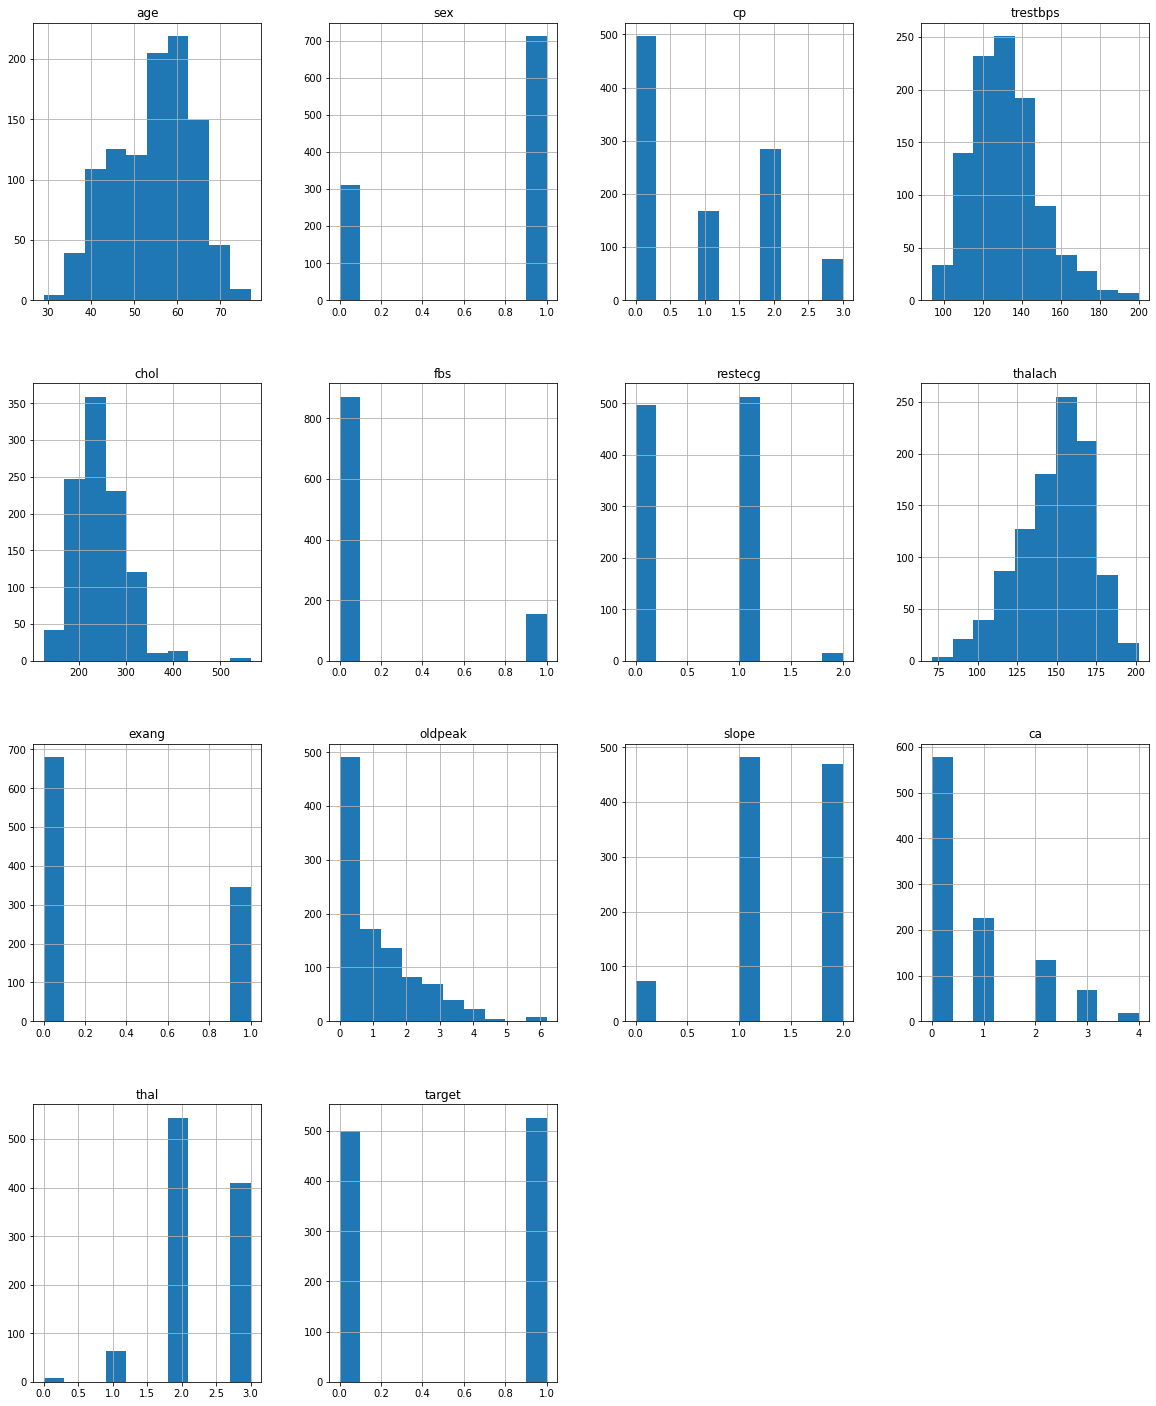

In [13]:
heart.hist(figsize=(20,25))

<AxesSubplot:>

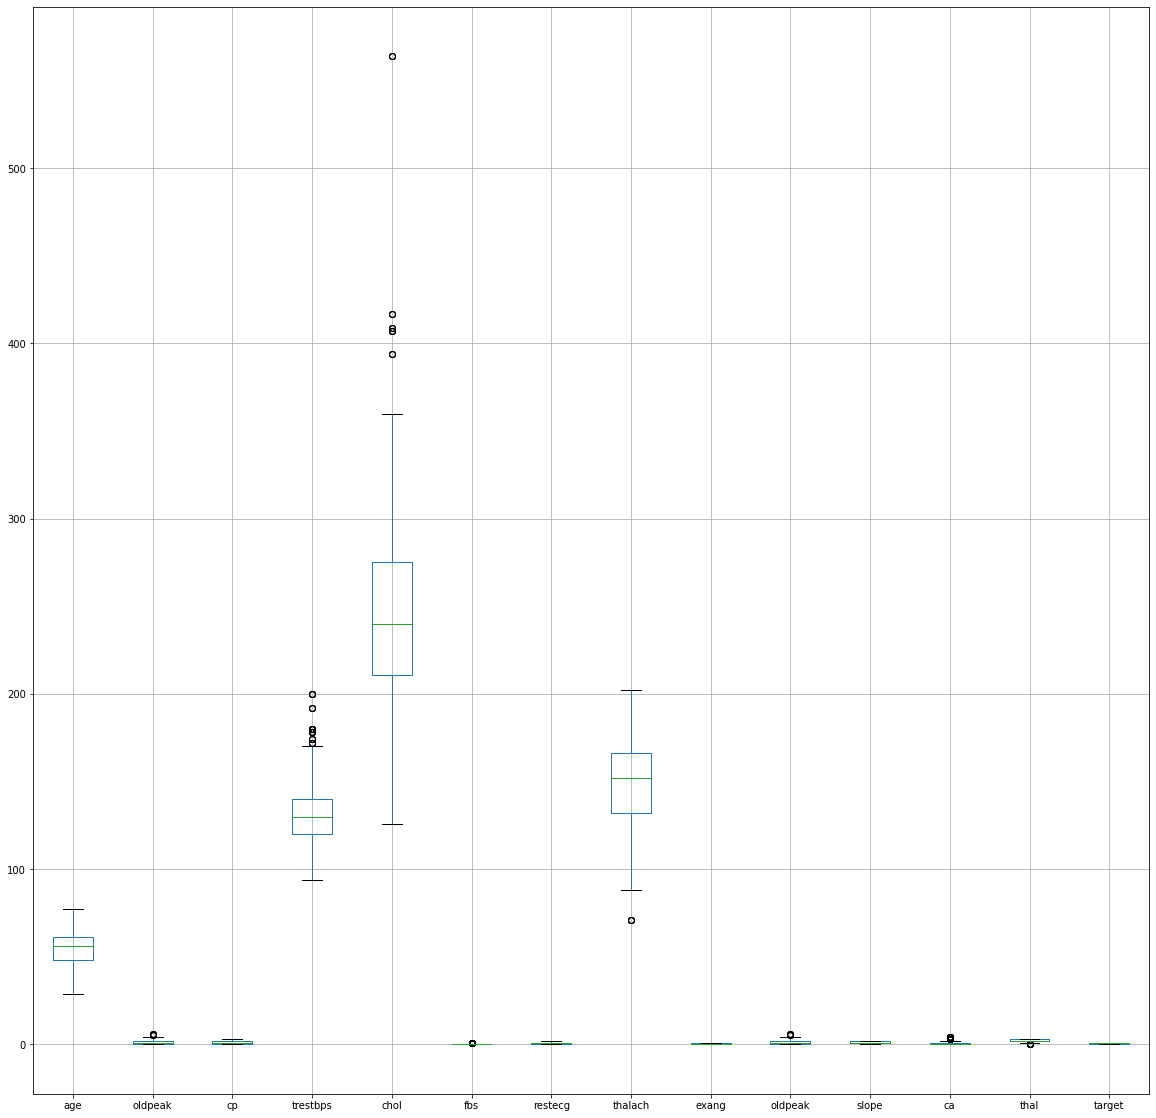

In [14]:
col = ['age','oldpeak','cp'  , 'trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
heart.boxplot(col, figsize=(20,20))

In [15]:
for c in heart.columns:
    if heart[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(heart[c].values)) 
        heart[c] = lbl.transform(list(heart[c].values))
        
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


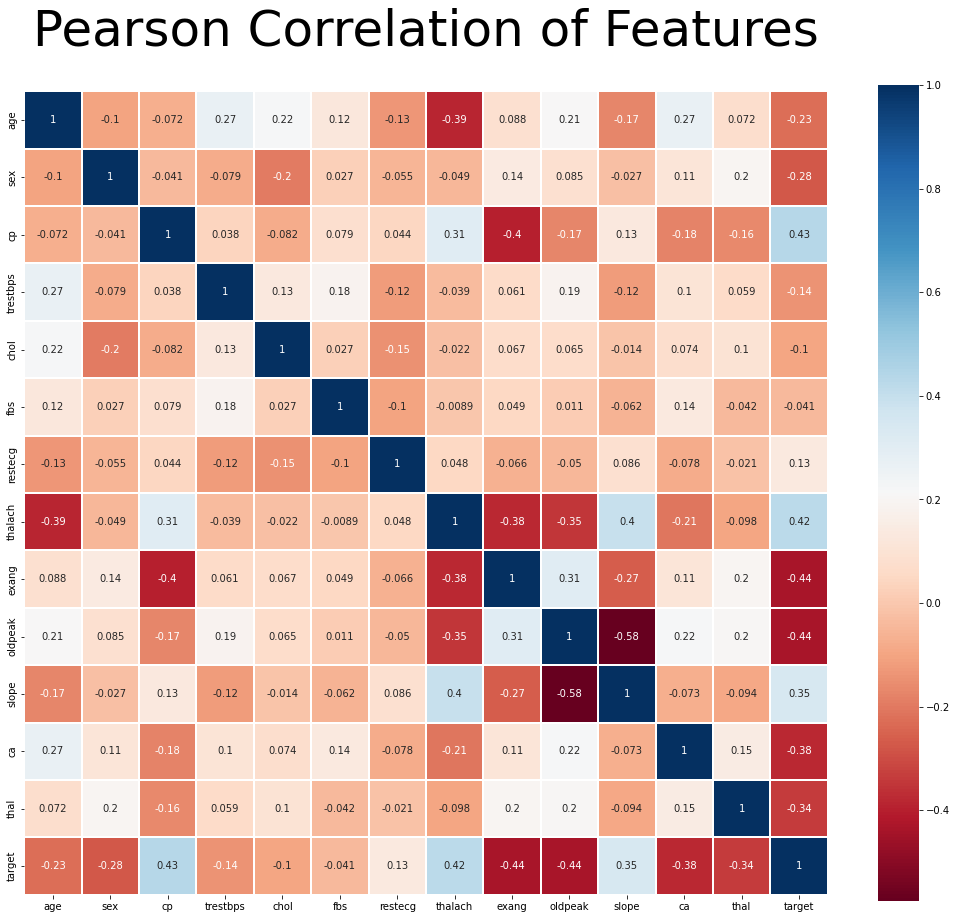

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(18,15));
plt.title('Pearson Correlation of Features', y=1.05, size=50);
sns.heatmap(heart.corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

In [17]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
x, y = heart.loc[:, heart.columns != 'target'], heart['target']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,)

In [19]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [20]:
y2=np.array([[25,212,0,1,168,0,1.0,2,2,3,1,1,1]])

# Prune features using decision tree

In [21]:
#Prune features using decision tree
clf = DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier()

In [22]:
pickle.dump(clf, open('decision_tree.pkl', 'wb'))

<AxesSubplot:>

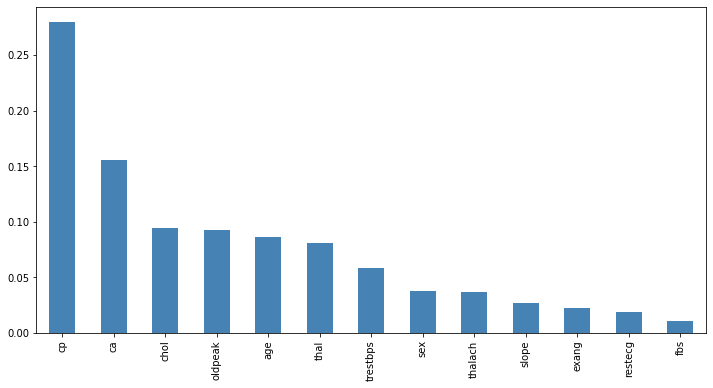

In [23]:
# Use the fitted model to generate a graph of feature importance
pd.Series(clf.feature_importances_, index=heart.columns[:len(heart.columns)-1]).sort_values(ascending=False).plot.bar(color='steelblue', figsize=(12, 6))

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
x_train

array([[-0.81100829,  0.64895597,  1.02735142, ...,  0.99910649,
        -0.72447299, -0.51284292],
       [ 1.50347012,  0.64895597,  1.02735142, ..., -0.64931871,
        -0.72447299,  1.09223798],
       [-2.79484693,  0.64895597,  0.05344603, ...,  0.99910649,
        -0.72447299, -0.51284292],
       ...,
       [-1.25186132,  0.64895597, -0.92045936, ..., -0.64931871,
        -0.72447299, -0.51284292],
       [ 0.62176406,  0.64895597, -0.92045936, ..., -0.64931871,
         1.24917435,  1.09223798],
       [-1.47228784,  0.64895597,  1.02735142, ...,  0.99910649,
        -0.72447299, -0.51284292]])

In [26]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics 
tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)
# Training
bagging.fit(x_train, y_train)
# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")
# Train Decision Tree Classifer
tree = tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1-Score:",metrics.f1_score(y_test, y_pred))

Train score: 0.8146341463414634
Test score: 0.7853658536585366
Accuracy: 0.8536585365853658
Precision: 0.8785046728971962
Recall: 0.8468468468468469
F1-Score: 0.8623853211009174


#### Seperate. using random forest test to verify results are the same

In [27]:
from sklearn.ensemble import RandomForestClassifier


In [28]:
clf = RandomForestClassifier(max_depth=5, random_state=23)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))


#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1-Score:",metrics.f1_score(y_test, y_pred))

0.9512195121951219
0.9317073170731708
Accuracy: 0.9317073170731708
Precision: 0.9532710280373832
Recall: 0.918918918918919
F1-Score: 0.9357798165137614


# Export the trained model to pickle

In [29]:
pickle.dump(clf, open('rf_model.pkl', 'wb'))

In [30]:
from explainerdashboard import *
x_test = pd.DataFrame(x_test, columns=x.columns)
explainer = ClassifierExplainer(clf, x_test, y_test)
InlineExplainer(explainer).importances()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [31]:
InlineExplainer(explainer).model_stats()

In [32]:
from explainerdashboard.custom import IndividualPredictionsComposite
ie=IndividualPredictionsComposite(explainer,hide_contributiontable=True)
ExplainerDashboard(explainer,title = 'Heart Disease visualization',contributions=False,
                   hide_poweredby=True,header_hide_download=True,decision_trees=False,shap_interaction=False
                   ,shap_dependence=False).run()

Calculating shap values...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating prediction probabilities...
Calculating metrics...


C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...


C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-pack

Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.1.229:8050


C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Hos\AppData\Local\Programs\Python\Python39\lib\site-pack